In [1]:
# Dependencies and Setup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

# Raw data file
file_2014 = os.path.join('austin_crime.csv')
file_2015 = os.path.join('Annual_Crime_Dataset_2015.csv')
file_2016 = os.path.join('2016_Annual_Crime_Data.csv')

# Read crime report files and store into pandas data frame
crime_data_2014 = pd.read_csv(file_2014)
crime_data_2015 = pd.read_csv(file_2015)
crime_data_2016 = pd.read_csv(file_2016)

In [2]:
# Check original length of csv file rows
print(len(crime_data_2014))
print("-------------")
print(len(crime_data_2015))
print("-------------")
print(len(crime_data_2016))

159464
-------------
38573
-------------
37461


In [3]:
# Turn 2014 crime csv into dataframe and drop unneccessary columns
crime_data_2014 = pd.DataFrame(crime_data_2014)
crime_data_2014 = crime_data_2014.drop("latitude",axis=1)
crime_data_2014 = crime_data_2014.drop("location",axis=1)
crime_data_2014 = crime_data_2014.drop("longitude",axis=1)
crime_data_2014 = crime_data_2014.drop("census_tract",axis=1)
crime_data_2014 = crime_data_2014.drop("unique_key",axis=1)
crime_data_2014 = crime_data_2014.drop("zipcode",axis=1)
crime_data_2014 = crime_data_2014.drop("clearance_date",axis=1)
crime_data_2014 = crime_data_2014.drop("council_district_code",axis=1)
crime_data_2014 = crime_data_2014.drop("description",axis=1)
crime_data_2014 = crime_data_2014.drop("location_description",axis=1)
crime_data_2014 = crime_data_2014.drop("address",axis=1)

# Drop all rows containing no values
crime_data_2014 = crime_data_2014.dropna()

# Extract only 2014 data
crime_data_2014 = crime_data_2014.drop(crime_data_2014[crime_data_2014.year == 2015.0].index)

# Reorder columns
crime_data_2014 = crime_data_2014[['primary_type', 'timestamp', 'clearance_status', 'district', 'x_coordinate', 'y_coordinate', 'year']]
crime_data_2014.head()


,primary_type,timestamp,clearance_status,district,x_coordinate,y_coordinate,year
4,Theft: Shoplifting,2014-04-04 00:00:00,Cleared by Arrest,B,3121345.0,10082705.0,2014.0
9,Auto Theft,2014-04-04 00:00:00,Not cleared,C,3118304.0,10072414.0,2014.0
14,Theft: All Other Larceny,2014-05-08 00:00:00,Not cleared,H,3125886.0,10047276.0,2014.0
17,Auto Theft,2014-12-18 00:00:00,Not cleared,C,3125976.0,10072207.0,2014.0
20,Theft: All Other Larceny,2014-04-16 00:00:00,Not cleared,B,3117183.0,10103211.0,2014.0


In [4]:
# Edit timestamp column to show only month
crime_data_2014['timestamp'] = crime_data_2014['timestamp'].map(lambda x: str(x)[5:7])
crime_data_2014.head()

,primary_type,timestamp,clearance_status,district,x_coordinate,y_coordinate,year
4,Theft: Shoplifting,04,Cleared by Arrest,B,3121345.0,10082705.0,2014.0
9,Auto Theft,04,Not cleared,C,3118304.0,10072414.0,2014.0
14,Theft: All Other Larceny,05,Not cleared,H,3125886.0,10047276.0,2014.0
17,Auto Theft,12,Not cleared,C,3125976.0,10072207.0,2014.0
20,Theft: All Other Larceny,04,Not cleared,B,3117183.0,10103211.0,2014.0


In [5]:
# Edit clearance status to display only first character
crime_data_2014['clearance_status'] = crime_data_2014['clearance_status'].map(lambda x: str(x)[0:1])
crime_data_2014.head()

,primary_type,timestamp,clearance_status,district,x_coordinate,y_coordinate,year
4,Theft: Shoplifting,04,C,B,3121345.0,10082705.0,2014.0
9,Auto Theft,04,N,C,3118304.0,10072414.0,2014.0
14,Theft: All Other Larceny,05,N,H,3125886.0,10047276.0,2014.0
17,Auto Theft,12,N,C,3125976.0,10072207.0,2014.0
20,Theft: All Other Larceny,04,N,B,3117183.0,10103211.0,2014.0


In [6]:
crime_data_2014['primary_type_cleaned'] = crime_data_2014['primary_type']

In [7]:
import re
regex_pat = re.compile(r'^Theft:.*$', flags=re.IGNORECASE)
crime_data_2014["primary_type_cleaned"].replace(regex_pat, "Theft", inplace=True)

crime_data_2014["primary_type"] = crime_data_2014["primary_type_cleaned"]
crime_data_2014 = crime_data_2014.drop("primary_type_cleaned",axis=1)
crime_data_2014.head()

,primary_type,timestamp,clearance_status,district,x_coordinate,y_coordinate,year
4,Theft,04,C,B,3121345.0,10082705.0,2014.0
9,Auto Theft,04,N,C,3118304.0,10072414.0,2014.0
14,Theft,05,N,H,3125886.0,10047276.0,2014.0
17,Auto Theft,12,N,C,3125976.0,10072207.0,2014.0
20,Theft,04,N,B,3117183.0,10103211.0,2014.0


In [8]:
crime_data_2014["district"].value_counts()

D     4701
E     4437
F     3974
A     3835
I     3745
B     3673
H     3387
G     2603
C     2531
AP     110
Name: district, dtype: int64

In [9]:
crime_data_2014["timestamp"].value_counts()

07    3000
08    2942
10    2915
05    2822
03    2761
09    2756
01    2750
06    2711
04    2667
12    2642
11    2602
02    2428
Name: timestamp, dtype: int64

In [10]:
crime_data_2014["primary_type"]=crime_data_2014["primary_type"].replace({"Aggravated Assault":"Agg Assault","Homicide: Murder & Nonnegligent Manslaughter":"Homicide"})
crime_data_2014["primary_type"].value_counts()

Theft          28143
Auto Theft      2162
Agg Assault     1827
Robbery          839
Homicide          25
Name: primary_type, dtype: int64

In [11]:
# Check length of set
len(crime_data_2014)

32996

In [12]:
# Turn 2015 and 2016 crime csv into dataframes and drop unneccessary columns
crime_data_2015 = pd.DataFrame(crime_data_2015)
crime_data_2016 = pd.DataFrame(crime_data_2016)

crime_data_2015 = crime_data_2015.drop("GO Primary Key",axis=1)
crime_data_2016 = crime_data_2016.drop("GO Primary Key",axis=1)

crime_data_2015 = crime_data_2015.drop("GO Highest Offense Desc",axis=1)
crime_data_2016 = crime_data_2016.drop("GO Highest Offense Desc",axis=1)

crime_data_2015 = crime_data_2015.drop("Clearance Date",axis=1)
crime_data_2016 = crime_data_2016.drop("Clearance Date",axis=1)

crime_data_2015 = crime_data_2015.drop("GO Location Zip",axis=1)
crime_data_2016 = crime_data_2016.drop("GO Location Zip",axis=1)

crime_data_2015 = crime_data_2015.drop("GO Location",axis=1)
crime_data_2016 = crime_data_2016.drop("GO Location",axis=1)

crime_data_2015 = crime_data_2015.drop("GO Census Tract",axis=1)
crime_data_2016 = crime_data_2016.drop("GO Census Tract",axis=1)

crime_data_2015 = crime_data_2015.drop("Council District",axis=1)
crime_data_2016 = crime_data_2016.drop("Council District",axis=1)

# Drop all rows containing no values
crime_data_2015 = crime_data_2015.dropna()
crime_data_2016 = crime_data_2016.dropna()

In [13]:
# Rename columns for merge
crime_data_2015.columns = ['primary_type', 'timestamp', 'clearance_status', 'district', 'x_coordinate', 'y_coordinate']

# Add year column
crime_data_2015['year'] = 2015.0

In [14]:
# Edit timestamp column to show only month
for index, row in crime_data_2015.iterrows():
    split = row['timestamp']
    split = split.split('-')[1]
    crime_data_2015.set_value(index, 'timestamp', split)

C:\Users\Subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [15]:
crime_data_2015["primary_type"].value_counts()

Theft          26624
Burglary        4846
Auto Theft      1982
Agg Assault     1829
Robbery          826
Murder            18
Name: primary_type, dtype: int64

In [16]:
crime_data_2015 = crime_data_2015[crime_data_2015.district != "UK"]
crime_data_2015["district"].value_counts()

D     5226
E     4719
B     4691
F     4422
I     4118
A     3950
H     3508
C     2747
G     2577
AP     166
Name: district, dtype: int64

In [17]:
crime_data_2015["timestamp"].value_counts()

Jul    3311
Aug    3153
May    3129
Jun    3060
Apr    3019
Mar    3016
Dec    2973
Sep    2961
Jan    2949
Nov    2908
Oct    2887
Feb    2758
Name: timestamp, dtype: int64

In [18]:
crime_data_2015["primary_type"]=crime_data_2015["primary_type"].replace({"Murder":"Homicide"})
crime_data_2015["primary_type"].value_counts()

Theft          26624
Burglary        4846
Auto Theft      1982
Agg Assault     1828
Robbery          826
Homicide          18
Name: primary_type, dtype: int64

In [19]:
# Rename columns for merge
crime_data_2016.columns = ['primary_type', 'timestamp', 'clearance_status', 'district', 'x_coordinate', 'y_coordinate']

# Add year column
crime_data_2016["year"] = 2016.0

In [20]:
# Edit timestamp column to show only month
for index, row in crime_data_2016.iterrows():
    split = row['timestamp']
    split = split.split('-')[1]
    crime_data_2016.set_value(index, 'timestamp', split)

C:\Users\Subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [21]:
crime_data_2016["timestamp"].value_counts()

Jan    3069
Mar    3064
Apr    3014
Oct    3007
Jun    2975
May    2926
Sep    2881
Dec    2876
Nov    2854
Aug    2830
Jul    2801
Feb    2676
Name: timestamp, dtype: int64

In [22]:
crime_data_2016 = crime_data_2016[crime_data_2016.district != "88"]
crime_data_2016 = crime_data_2016[crime_data_2016.district != "UK"]
crime_data_2016["district"].value_counts()

D     5083
E     4409
F     4172
B     4159
I     4065
H     3957
A     3793
C     2653
G     2518
AP     154
Name: district, dtype: int64

In [23]:
crime_data_2016["primary_type"].value_counts()

Theft          24907
Burglary        5036
Agg Assault     2090
Auto Theft      1989
Robbery          911
Murder            30
Name: primary_type, dtype: int64

In [24]:
# Check length of set
len(crime_data_2015)

36124

In [25]:
# Check length of set
len(crime_data_2016)

34963

In [26]:
crime_data_2016["primary_type"]=crime_data_2016["primary_type"].replace({"Murder":"Homicide"})
crime_data_2016["primary_type"].value_counts()


Theft          24907
Burglary        5036
Agg Assault     2090
Auto Theft      1989
Robbery          911
Homicide          30
Name: primary_type, dtype: int64

In [27]:
output_data_file_2014 = "clean_csvs/crime_2014.csv"
output_data_file_2015 = "clean_csvs/crime_2015.csv"
output_data_file_2016 = "clean_csvs/crime_2016.csv"

In [28]:
crime_data_2014.to_csv(output_data_file_2014)
crime_data_2015.to_csv(output_data_file_2015)
crime_data_2016.to_csv(output_data_file_2016)

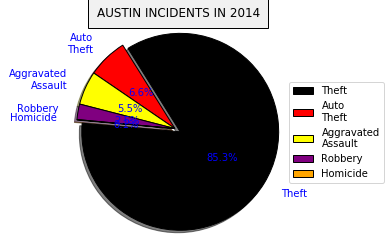

In [29]:
# PIE CHART PLOTTING OF ALL CRIMES IN AUSTIN IN 2014
incident_type_2014 = ['Theft','Auto\nTheft', 'Aggravated\nAssault', 'Robbery', 'Homicide']
values = [28143, 2162, 1827, 839, 25]
colors = ["Black", "red", "yellow", "purple","orange"]
#plt.legend(incident_type_2014, title="INCIDENT TYPES",loc="upper right")
plt.title("AUSTIN INCIDENTS IN 2014",bbox={'facecolor':'15', 'pad':8})
#only explode theft slice(1st)
explode=(0.05,0,0,0,0)
pie=plt.pie(values,labels=incident_type_2014,explode=explode,colors=colors,
         autopct="%0.1f%%", shadow=True, startangle=175, pctdistance=0.5,
        labeldistance=1.2,radius=0.8,textprops={"color":"b"},wedgeprops = { 'linewidth': 1, "edgecolor" :"k" })
plt.legend(pie[0],incident_type_2014, bbox_to_anchor=(1,0.5), loc="right",bbox_transform=plt.gcf().transFigure)
plt.axis("equal")
plt.show()

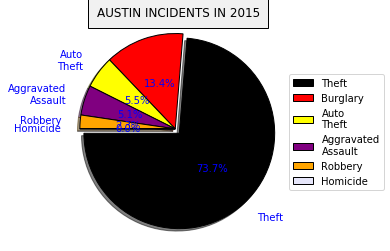

In [30]:
# PIE CHART PLOTTING OF ALL CRIMES IN AUSTIN IN 2015
incident_type_2015 = ['Theft','Burglary','Auto\nTheft', 'Aggravated\nAssault', 'Robbery', 'Homicide']
values = [26624, 4846, 1982, 1829, 826, 18]
colors = ["Black", "red", "yellow", "purple","orange","lavender"]
plt.title("AUSTIN INCIDENTS IN 2015",bbox={'facecolor':'15', 'pad':8})
explode=(0.05,0,0,0,0,0)
pie=plt.pie(values,labels=incident_type_2015, explode=explode,colors=colors,
         autopct="%0.1f%%", shadow=True, startangle=180, pctdistance=0.5,
        labeldistance=1.2,radius=0.8,textprops={"color":"b"},wedgeprops = { 'linewidth': 1, "edgecolor" :"k" })
plt.legend(pie[0],incident_type_2015, bbox_to_anchor=(1,0.5), loc="right",bbox_transform=plt.gcf().transFigure)
plt.axis("equal")
plt.show()

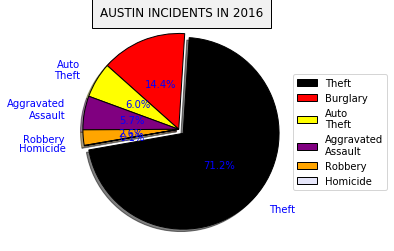

In [31]:
# PIE CHART PLOTTING OF ALL CRIMES IN AUSTIN IN 2016
incident_type_2016 = ['Theft','Burglary','Auto\nTheft', 'Aggravated\nAssault', 'Robbery', 'Homicide']
values = [24911, 5039, 2092, 1990, 911, 30]
colors = ["Black", "red", "yellow", "purple","orange","lavender"]
plt.title("AUSTIN INCIDENTS IN 2016",bbox={'facecolor':'15', 'pad':8})
explode=(0.05,0,0,0,0,0)
pie=plt.pie(values,labels=incident_type_2016,explode=explode,colors=colors,
         autopct="%0.1f%%", shadow=True, startangle=190, pctdistance=0.5,
        labeldistance=1.2,radius=0.8,textprops={"color":"b"},wedgeprops = { 'linewidth': 1, "edgecolor" :"k" })
plt.legend(pie[0],incident_type_2016, bbox_to_anchor=(1,0.5), loc="right",bbox_transform=plt.gcf().transFigure)
plt.axis("equal")
plt.show()

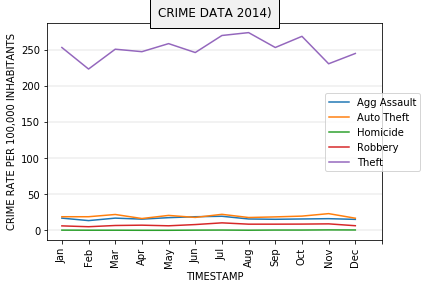

<Figure size 1440x2160 with 0 Axes>

In [32]:
# LINE GRAPH PLOTTING OF CRIME RATES IN EACH MONTH IN THE YEAR 2014 IN AUSTIN

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
slimmed_data = crime_data_2014[['primary_type', 'timestamp']]
#get_dummies function converts categorical variable into dummy/indicator variables
#which means, it converts the values of variables into binary values.
test = pd.get_dummies(slimmed_data, columns=['primary_type'])
grouped = test.groupby('timestamp').sum()
grouped.reindex(labels= months)
Austin_Population = 931,830
Austin_Population = 931830 / 100000
crimes_popl_2014 = (grouped/Austin_Population)
crimes_popl_2014.plot(kind='line')
plt.ylabel('CRIME RATE PER 100,000 INHABITANTS')
plt.xlabel('TIMESTAMP')
plt.title('CRIME DATA 2014)',bbox={'facecolor':'15', 'pad':8})
plt.xticks(np.arange(0, 13, 1),months,rotation='vertical')
plt.legend(['Agg Assault','Auto Theft','Homicide','Robbery','Theft'], 
           bbox_to_anchor=(1,0.5), loc="right",bbox_transform=plt.gcf().transFigure)
plt.gca().yaxis.grid(True,color='k', linestyle='-', linewidth=0.1) 
# plt.savefig('crime_months_2014.png',bbox_inches='tight')
plt.figure(figsize=(20,30))
plt.tight_layout()
plt.show()

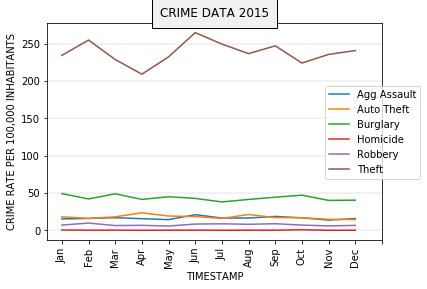

<Figure size 1440x2160 with 0 Axes>

In [33]:
# LINE GRAPH PLOTTING OF CRIME RATES IN EACH MONTH IN THE YEAR 2015 IN AUSTIN

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
slimmed_data = crime_data_2015[['primary_type', 'timestamp']]
test = pd.get_dummies(slimmed_data, columns=['primary_type'])
grouped = test.groupby('timestamp').sum()
grouped.reindex(labels= months)
Austin_Population = 931,830
Austin_Population = 931830 / 100000
crimes_popl_2015 = (grouped /Austin_Population)
crimes_popl_2015.plot(kind='line')
plt.ylabel('CRIME RATE PER 100,000 INHABITANTS')
plt.xlabel('TIMESTAMP')
plt.title('CRIME DATA 2015',bbox={'facecolor':'15', 'pad':8})
plt.xticks(np.arange(0, 13, 1),months,rotation='vertical')
plt.legend(['Agg Assault','Auto Theft','Burglary','Homicide','Robbery','Theft'], 
           bbox_to_anchor=(1,0.5), loc="right",bbox_transform=plt.gcf().transFigure)
plt.gca().yaxis.grid(True,color='k', linestyle='-', linewidth=0.1)
plt.figure(figsize=(20,30))
plt.tight_layout()
plt.show()

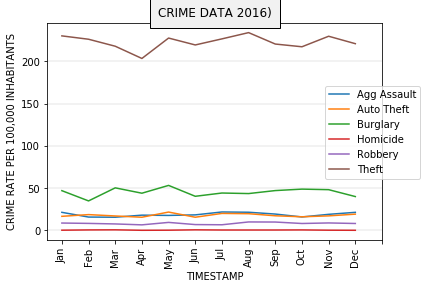

<Figure size 1440x2160 with 0 Axes>

In [34]:
# LINE GRAPH PLOTTING OF CRIME RATES IN EACH MONTH IN THE YEAR 2016 IN AUSTIN

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
slimmed_data = crime_data_2016[['primary_type', 'timestamp']]
test = pd.get_dummies(slimmed_data, columns=['primary_type'])
grouped = test.groupby('timestamp').sum()
grouped.reindex(labels= months)
Austin_Population = 931,830
Austin_Population = 931830 / 100000
crimes_popl_2016 = (grouped /Austin_Population)
crimes_popl_2016.plot(kind='line')
plt.ylabel('CRIME RATE PER 100,000 INHABITANTS')
plt.xlabel('TIMESTAMP')
plt.title('CRIME DATA 2016)',bbox={'facecolor':'15', 'pad':8})
plt.xticks(np.arange(0, 13, 1),months,rotation='vertical')
plt.legend(['Agg Assault','Auto Theft','Burglary','Homicide','Robbery','Theft'], 
           bbox_to_anchor=(1,0.5), loc="right",bbox_transform=plt.gcf().transFigure)
plt.gca().yaxis.grid(True,color='k', linestyle='-', linewidth=0.1) 
plt.figure(figsize=(20,30))
plt.tight_layout()
plt.show()

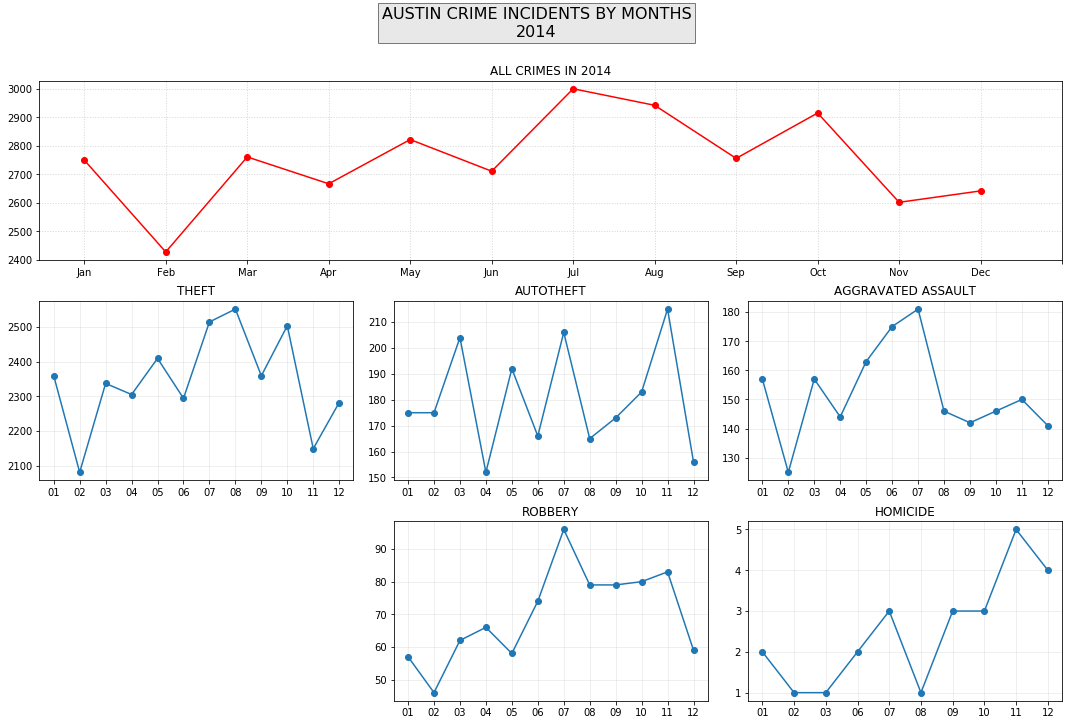

In [35]:
# LINE GRAPH PLOTTING OF ALL CRIMES BY MONTHS IN 2014 IN AUSTIN AND PLOTS OF EACH CRIME BY MONTH

from pylab import rcParams
# This makes the figure's width 15 inches, and its height 10 inches.
rcParams['figure.figsize'] = 15, 10

plt.suptitle('AUSTIN CRIME INCIDENTS BY MONTHS\n2014', horizontalalignment='center',
         verticalalignment='center', bbox=dict(facecolor='lightgrey', alpha=0.5),fontsize=16)

#plt.subplot2grid - Creates an axis at specific location inside a regular grid.
#Used here in order to place several different plots in specific locations within a grid

ax6 = plt.subplot2grid((3,3),(0,0),colspan=3)
ax6.plot(crime_data_2014.groupby("timestamp").size(),marker='o',color='r')
ax6.set_title('ALL CRIMES IN 2014')
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax6.xaxis.set_ticks(np.arange(0, 13, 1))
ax6.set_xticklabels(labels)
ax6.grid(linestyle=":", linewidth=1,alpha=0.5)

theft = crime_data_2014[crime_data_2014['primary_type']=='Theft']
ax1 = plt.subplot2grid((3,3),(1,0))
ax1.plot(theft.groupby('timestamp').size(),marker='o')
ax1.set_title('THEFT')
ax1.grid(linewidth=1,alpha=0.2)

autotheft = crime_data_2014[crime_data_2014['primary_type']=='Auto Theft']
ax2 = plt.subplot2grid((3,3),(1,1))
ax2.plot(autotheft.groupby('timestamp').size(),marker='o')
ax2.set_title('AUTOTHEFT')
ax2.grid(linewidth=1,alpha=0.2)

aggravatedassault = crime_data_2014[crime_data_2014['primary_type']=='Agg Assault']
ax3 = plt.subplot2grid((3,3),(1,2))
ax3.plot(aggravatedassault.groupby('timestamp').size(),marker='o')
ax3.set_title('AGGRAVATED ASSAULT')
ax3.grid(linewidth=1,alpha=0.2)

robbery = crime_data_2014[crime_data_2014['primary_type']=='Robbery']
ax4 = plt.subplot2grid((3,3),(2,1))
ax4.plot(robbery.groupby('timestamp').size(),marker='o')
ax4.set_title('ROBBERY')
ax4.grid(linewidth=1,alpha=0.2)

homicide = crime_data_2014[crime_data_2014['primary_type']=='Homicide']
ax5 = plt.subplot2grid((3,3),(2,2))
ax5.plot(homicide.groupby('timestamp').size(),marker='o')
ax5.set_title('HOMICIDE')
ax5.grid(linewidth=1,alpha=0.2)

# Tight layout often produces nice results but requires the title to be spaced accordingly
# and in to avoid overlapping labels
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

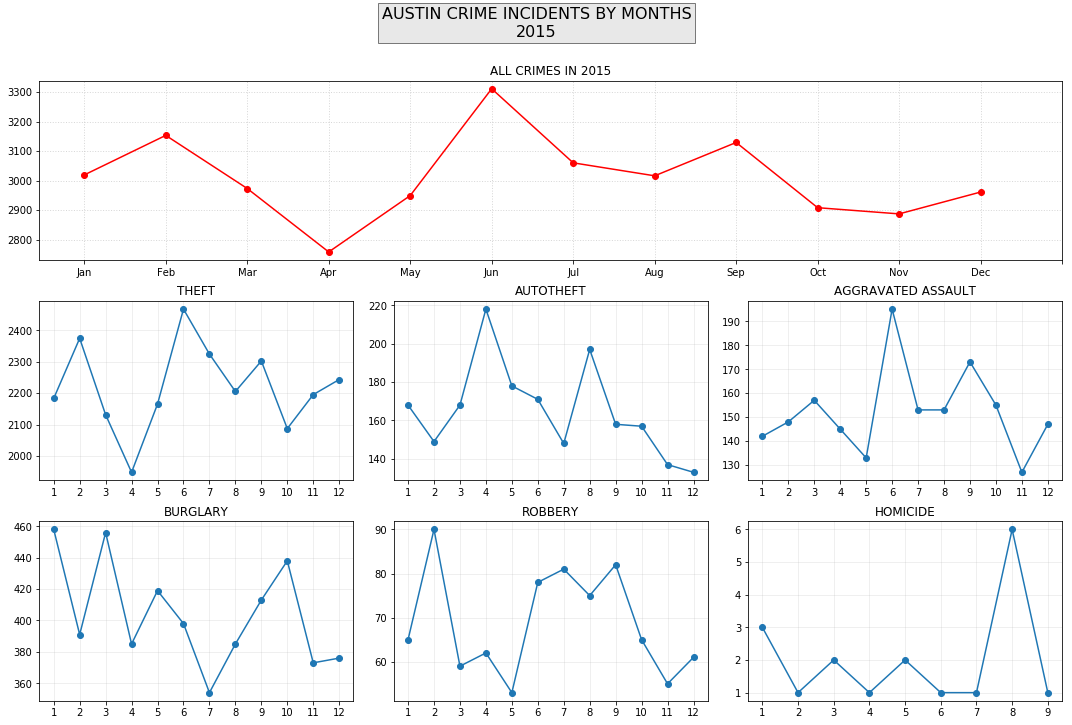

In [36]:
# LINE GRAPH PLOTTING OF ALL CRIMES BY MONTHS IN 2015 IN AUSTIN AND SUBPLOTS OF EACH CRIME BY MONTH


rcParams['figure.figsize'] = 15, 10
plt.suptitle('AUSTIN CRIME INCIDENTS BY MONTHS\n2015', horizontalalignment='center',
         verticalalignment='center', bbox=dict(facecolor='lightgrey', alpha=0.5),fontsize=16)

#plt.subplot2grid - Creates an axis at specific location inside a regular grid.
#Used here in order to place several different plots in specific locations within a grid
ax6 = plt.subplot2grid((3,3),(0,0),colspan=3)
ax6.plot(crime_data_2015.groupby("timestamp").size(),marker='o', color="r")
ax6.set_title('ALL CRIMES IN 2015')
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax6.xaxis.set_ticks(np.arange(0, 13, 1))
ax6.set_xticklabels(labels)
ax6.grid(linestyle=":", linewidth=1,alpha=0.5)

theft = crime_data_2015[crime_data_2015['primary_type']=='Theft']
ax1 = plt.subplot2grid((3,3),(1,0))
ax1.plot(theft.groupby('timestamp').size(),marker='o')
ax1.set_title('THEFT')
x_ticks = np.arange(1,13,1)
ax1.set_xticklabels(x_ticks)
ax1.grid(linewidth=1,alpha=0.2)

burglary = crime_data_2015[crime_data_2015['primary_type']=='Burglary']
ax7 = plt.subplot2grid((3,3),(2,0))
ax7.plot(burglary.groupby('timestamp').size(),marker='o')
ax7.set_title('BURGLARY')
x_ticks = np.arange(1,13,1)
ax7.set_xticklabels(x_ticks)
ax7.grid(linewidth=1,alpha=0.2)

autotheft = crime_data_2015[crime_data_2015['primary_type']=='Auto Theft']
ax2 = plt.subplot2grid((3,3),(1,1))
ax2.plot(autotheft.groupby('timestamp').size(),marker='o')
ax2.set_title('AUTOTHEFT')
x_ticks = np.arange(1,13,1)
ax2.set_xticklabels(x_ticks)
ax2.grid(linewidth=1,alpha=0.2)

aggravatedassault = crime_data_2015[crime_data_2015['primary_type']=='Agg Assault']
ax3 = plt.subplot2grid((3,3),(1,2))
ax3.plot(aggravatedassault.groupby('timestamp').size(),marker='o')
ax3.set_title('AGGRAVATED ASSAULT')
x_ticks = np.arange(1,13,1)
ax3.set_xticklabels(x_ticks)
ax3.grid(linewidth=1,alpha=0.2)

robbery = crime_data_2015[crime_data_2015['primary_type']=='Robbery']
ax4 = plt.subplot2grid((3,3),(2,1))
ax4.plot(robbery.groupby('timestamp').size(),marker='o')
ax4.set_title('ROBBERY')
x_ticks = np.arange(1,13,1)
ax4.set_xticklabels(x_ticks)
ax4.grid(linewidth=1,alpha=0.2)

homicide = crime_data_2015[crime_data_2015['primary_type']=='Homicide']
ax5 = plt.subplot2grid((3,3),(2,2))
ax5.plot(homicide.groupby('timestamp').size(),marker='o')
ax5.set_title('HOMICIDE')
x_ticks = np.arange(1,13,1)
ax5.set_xticklabels(x_ticks)
ax5.grid(linewidth=1,alpha=0.2)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

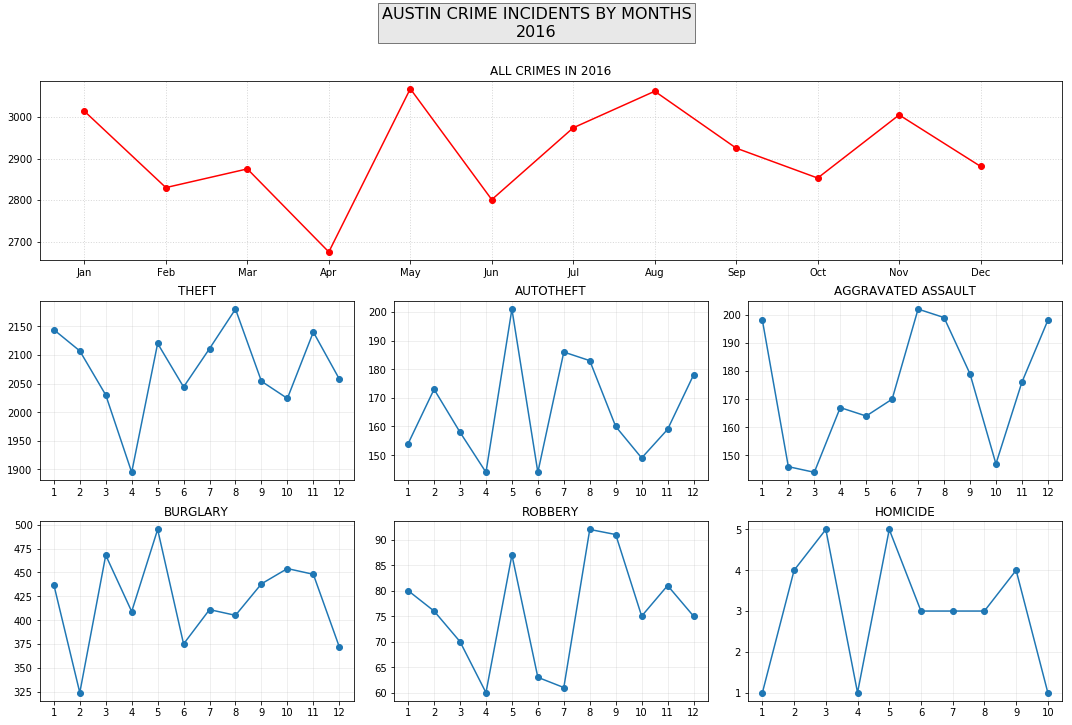

In [37]:
# LINE GRAPH PLOTTING OF ALL CRIMES BY MONTHS IN 2016 IN AUSTIN AND PLOTS OF EACH CRIME BY MONTH

rcParams['figure.figsize'] = 15, 10

plt.suptitle('AUSTIN CRIME INCIDENTS BY MONTHS\n2016', horizontalalignment='center',
         verticalalignment='center', bbox=dict(facecolor='lightgrey', alpha=0.5),fontsize=16)

#plt.subplot2grid - Creates an axis at specific location inside a regular grid.
#Used here in order to place several different plots in specific locations within a grid

ax6 = plt.subplot2grid((3,3),(0,0),colspan=3)
ax6.plot(crime_data_2016.groupby('timestamp').size(),marker='o',color='r')
ax6.set_title('ALL CRIMES IN 2016')
x_ticks = np.arange(1,13,1)
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax6.xaxis.set_ticks(np.arange(0, 13, 1))
ax6.set_xticklabels(labels)
ax6.grid(linestyle=":", linewidth=1,alpha=0.5)

theft = crime_data_2016[crime_data_2016['primary_type']=='Theft']
ax1 = plt.subplot2grid((3,3),(1,0))
ax1.plot(theft.groupby('timestamp').size(),marker='o')
ax1.set_title('THEFT')
x_ticks = np.arange(1,13,1)
ax1.set_xticklabels(x_ticks)
ax1.grid(linewidth=1,alpha=0.2)

burglary = crime_data_2016[crime_data_2016['primary_type']=='Burglary']
ax7 = plt.subplot2grid((3,3),(2,0))
ax7.plot(burglary.groupby('timestamp').size(),marker='o')
ax7.set_title('BURGLARY')
x_ticks = np.arange(1,13,1)
ax7.set_xticklabels(x_ticks)
ax7.grid(linewidth=1,alpha=0.2)

aggravatedassault = crime_data_2016[crime_data_2016['primary_type']=='Agg Assault']
ax3 = plt.subplot2grid((3,3),(1,2))
ax3.plot(aggravatedassault.groupby('timestamp').size(),marker='o')
ax3.set_title('AGGRAVATED ASSAULT')
x_ticks = np.arange(1,13,1)
ax3.set_xticklabels(x_ticks)
ax3.grid(linewidth=1,alpha=0.2)

autotheft = crime_data_2016[crime_data_2016['primary_type']=='Auto Theft']
ax2 = plt.subplot2grid((3,3),(1,1))
ax2.plot(autotheft.groupby('timestamp').size(),marker='o')
ax2.set_title('AUTOTHEFT')
x_ticks = np.arange(1,13,1)
ax2.set_xticklabels(x_ticks)
ax2.grid(linewidth=1,alpha=0.2)

robbery = crime_data_2016[crime_data_2016['primary_type']=='Robbery']
ax4 = plt.subplot2grid((3,3),(2,1))
ax4.plot(robbery.groupby('timestamp').size(),marker='o')
ax4.set_title('ROBBERY')
x_ticks = np.arange(1,13,1)
ax4.set_xticklabels(x_ticks)
ax4.grid(linewidth=1,alpha=0.2)

homicide = crime_data_2016[crime_data_2016['primary_type']=='Homicide']
ax5 = plt.subplot2grid((3,3),(2,2))
ax5.plot(homicide.groupby('timestamp').size(),marker='o')
ax5.set_title('HOMICIDE')
x_ticks = np.arange(1,13,1)
ax5.set_xticklabels(x_ticks)
ax5.grid(linewidth=1,alpha=0.2)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()